In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn

Accuracy using k = 1 neighbors is:  0.824390243902439


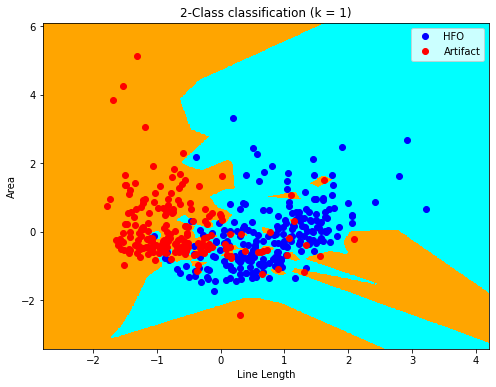

Accuracy using k = 5 neighbors is:  0.8536585365853658


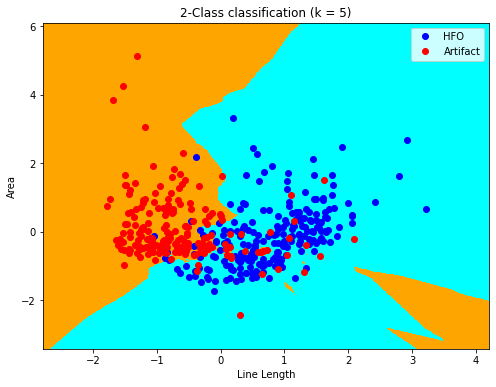

Accuracy using k = 10 neighbors is:  0.8682926829268293


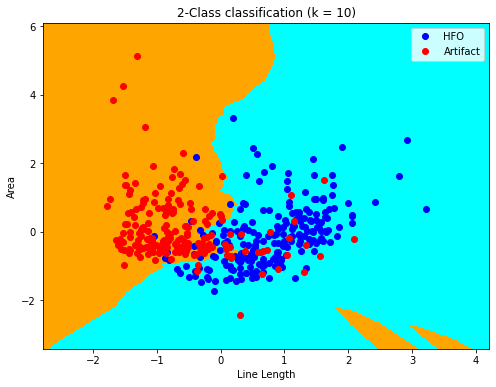

Accuracy using k = 15 neighbors is:  0.8878048780487805


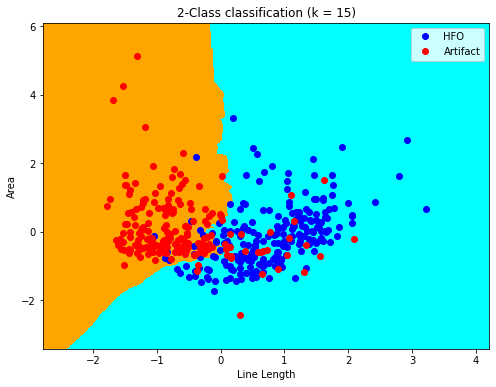

In [ ]:
def plot_KNN_boundary(k):
    '''
    Args:
        k: Number of neighbors to use for kneighbors queries.

    Returns:
    Notes:
        1. Please do not change the provided code
        2. save the predicted labels as y_test for plotting
    '''
    # import training data
    df = pd.read_excel(open('Data_matrices.xlsx', 'rb'), sheet_name="Full data")
    X = df.iloc[:,0:2] #Features
    y = df.iloc[:,4:] #Labels

    # Standarize the features
    standardizer = StandardScaler()
    X = pd.DataFrame(standardizer.fit_transform(X))

    # Split into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size = 0.33, random_state=42)

    # 1. train a KNN classifier
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train.ravel())
    

    # 2. Check the accuracy predictions using X_test
    acc = classifier.score(X_test, y_test)
    print("Accuracy using k = %i neighbors is: " % (k), acc)


    # mesh 2d space into grid
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
    X_test = np.c_[xx.ravel(), yy.ravel()]
    y_test = np.zeros(xx.shape)

    # Predict the values of each mesh-point
    y_test = classifier.predict(X_test)

    # Put the result into a color plot
    y_test = y_test.reshape(xx.shape)
    cmap_light = ListedColormap(['orange', 'cyan'])
    cmap_bold = ['darkorange', 'c']
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_test, cmap=cmap_light)

    # Separate the training points into HFOs and Artifacts
    hfos = X_train[y_train[:,0] == 2]
    artif = X_train[y_train[:,0] == 1]

    #Plot HFOs and artifacts using different colors
    plt.plot(hfos[:,0], hfos[:,1], 'o', color = 'blue', label='HFO')
    plt.plot(artif[:,0], artif[:,1], 'o', color = 'red', label='Artifact')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (k))
    plt.xlabel('Line Length')
    plt.ylabel('Area')
    plt.legend()
    plt.show()


# plot KNN decision boundaries with different k values
def visualize_KNN():
    for k in [1, 5, 10, 15]:
        plot_KNN_boundary(k)

visualize_KNN() ### Comment out this line when submitting ###

Accuracy using kernel = linear is: 0.8682926829268293


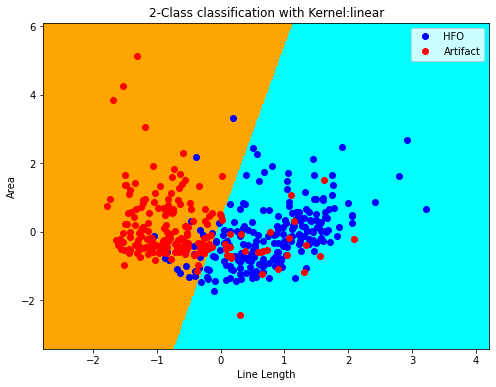

Accuracy using kernel = poly is: 0.8634146341463415


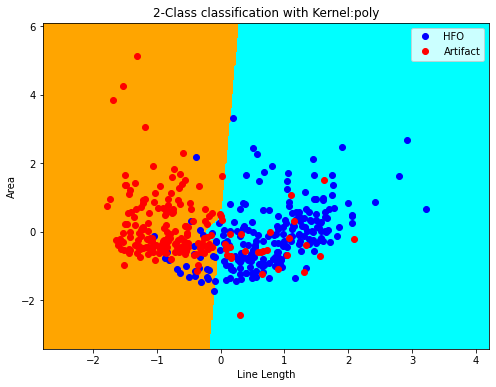

Accuracy using kernel = rbf is: 0.8829268292682927


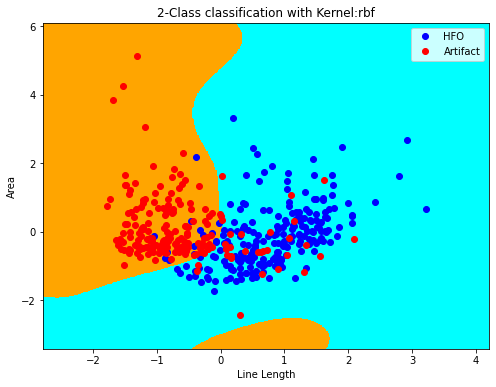

Accuracy using kernel = sigmoid is: 0.8097560975609757


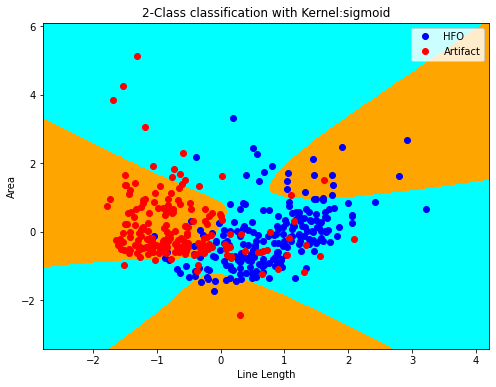

In [ ]:
def plot_SVM_boundary(kernel_):

    # import training data
    df = pd.read_excel(open('Data_matrices.xlsx', 'rb'), sheet_name="Full data")
    X = df.iloc[:,0:2] #Features
    y = df.iloc[:,4:] #Labels

    # Standarize the features
    standardizer = StandardScaler()
    X = pd.DataFrame(standardizer.fit_transform(X))

    # Split into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size = 0.33, random_state=42)

    # 1. train a SVM classifier
    classifier = sklearn.svm.SVC(kernel = kernel_)
    classifier.fit(X_train,y_train.ravel())
    

    # 2. Check the accuracy predictions using X_test
    acc = classifier.score(X_test, y_test)
    print("Accuracy using kernel =", kernel_, "is:", acc)


    # mesh 2d space into grid
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
    X_test = np.c_[xx.ravel(), yy.ravel()]
    y_test = np.zeros(xx.shape)

    # Predict the values of each mesh-point
    y_test = classifier.predict(X_test)

    # Put the result into a color plot
    y_test = y_test.reshape(xx.shape)
    cmap_light = ListedColormap(['orange', 'cyan'])
    cmap_bold = ['darkorange', 'c']
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_test, cmap=cmap_light)

    # Separate the training points into HFOs and Artifacts
    hfos = X_train[y_train[:,0] == 2]
    artif = X_train[y_train[:,0] == 1]

    #Plot HFOs and artifacts using different colors
    plt.plot(hfos[:,0], hfos[:,1], 'o', color = 'blue', label='HFO')
    plt.plot(artif[:,0], artif[:,1], 'o', color = 'red', label='Artifact')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification with Kernel:" + kernel_)
    plt.xlabel('Line Length')
    plt.ylabel('Area')
    plt.legend()
    plt.show()


# plot KNN decision boundaries with different k values
def visualize_svm():
    plot_SVM_boundary('linear')
    plot_SVM_boundary('poly')
    plot_SVM_boundary('rbf')
    plot_SVM_boundary('sigmoid')

visualize_svm() ### Comment out this line when submitting ###

Accuracy using penalty = none is: 0.848780487804878


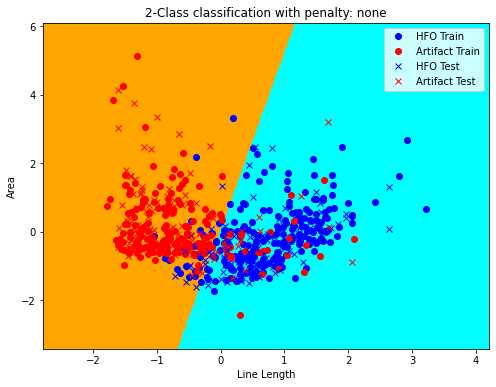

Accuracy using penalty = l2 is: 0.848780487804878


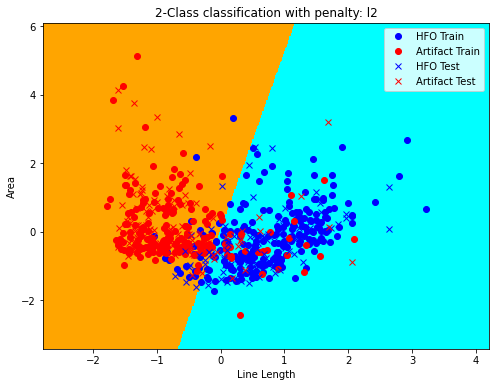

Accuracy using penalty = l1 is: 0.848780487804878


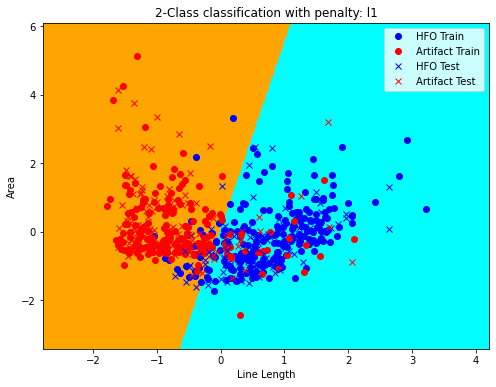

In [ ]:
def plot_Logistic_Regression_boundary(penalty_):

    # import training data
    df = pd.read_excel(open('Data_matrices.xlsx', 'rb'), sheet_name="Full data")
    X = df.iloc[:,0:2] #Features
    y = df.iloc[:,4:] #Labels

    # Standarize the features
    standardizer = StandardScaler()
    X = pd.DataFrame(standardizer.fit_transform(X))

    # Split into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size = 0.33, random_state=42)

    # 1. train a SVM classifier
    classifier = sklearn.linear_model.LogisticRegression(penalty = penalty_, solver = 'saga')
    classifier.fit(X_train,y_train.ravel())
    

    # 2. Check the accuracy predictions using X_test
    acc = classifier.score(X_test, y_test)
    print("Accuracy using penalty =", penalty_, "is:", acc)

    # Save those to use them later for plots
    y_test_dummy = y_test
    X_test_dummy = X_test

    # mesh 2d space into grid
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
    X_test = np.c_[xx.ravel(), yy.ravel()]
    y_test = np.zeros(xx.shape)

    # Predict the values of each mesh-point
    y_test = classifier.predict(X_test)

    # Put the result into a color plot
    y_test = y_test.reshape(xx.shape)
    cmap_light = ListedColormap(['orange', 'cyan'])
    cmap_bold = ['darkorange', 'c']
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_test, cmap=cmap_light)

    # Separate the training points into HFOs and Artifacts
    hfos = X_train[y_train[:,0] == 2]
    artif = X_train[y_train[:,0] == 1]

    #Separate the training points into HFOs and Artifacts
    y_test = y_test_dummy
    X_test = X_test_dummy
    hfos_test = X_test[y_test[:,0] == 2]
    artif_test = X_test[y_test[:,0] == 1]

    #Plot HFOs and artifacts using different colors
    plt.plot(hfos[:,0], hfos[:,1], 'o', color = 'blue', label='HFO Train')
    plt.plot(artif[:,0], artif[:,1], 'o', color = 'red', label='Artifact Train')
    plt.plot(hfos_test[:,0], hfos_test[:,1], 'x', color = 'blue', label='HFO Test')
    plt.plot(artif_test[:,0], artif_test[:,1], 'x', color = 'red', label='Artifact Test')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification with penalty: " + penalty_)
    plt.xlabel('Line Length')
    plt.ylabel('Area')
    plt.legend()
    plt.show()


# plot KNN decision boundaries with different k values
def visualize_regression():
    plot_Logistic_Regression_boundary('none')
    plot_Logistic_Regression_boundary('l2')
    plot_Logistic_Regression_boundary('l1')

visualize_regression() ### Comment out this line when submitting ###

In [ ]:
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def mapFeature(X, column1, column2, maxPower = 6):
    '''
    Maps the two specified input features to polynomial features. Does not standardize any features.
        
    Returns a new feature array with d2 features, comprising of
        X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, ... up to the maxPower polynomial
        
    Arguments:
        X is an n-by-d1 Pandas data frame, where d1 > 2
        column1 is the string specifying the column name corresponding to feature X1
        column2 is the string specifying the column name corresponding to feature X2
    Returns:
        an n-by-d2 Pandas data frame, where each row represents the original features augmented with the new features of the corresponding instance
    '''

    df1 = X[[column1]]
    df2 = X[[column2]]

    x1 = df1.to_numpy()
    x2 = df2.to_numpy()
    x1.shape = (x1.size,1)
    x2.shape = (x2.size,1)

    out = ones(shape=(x1[:,0].size,1))
    m,n = out.shape

    for i in range (1,maxPower+1):
      for j in range(i+1):
        r = (x1 ** (i-j)) * (x2**j)
        out = np.append(out,r,axis=1)
    
    out = np.delete(out,0,axis=1)
    outdf = pd.DataFrame(out)

    return outdf


Accuracy is: 0.8634146341463415


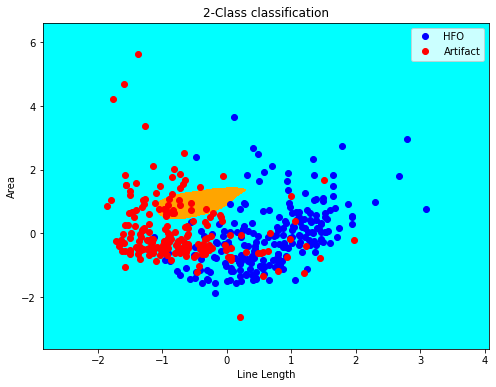

In [ ]:
#### Tried using map-Features to make it work better... Unfortunately the results are not better & mapping is not workring!
def my_best_hope():

    polyPower = 5

    # load the data
    df = pd.read_excel(open('Data_matrices.xlsx', 'rb'), sheet_name="Full data")
    X = df.iloc[:,0:2] #Features
    y = df.iloc[:,4:] #Labels

    n,d = X.shape

    # map features into a higher dimensional feature space
    Xaug = mapFeature(X.copy(), X.columns[0], X.columns[1], polyPower)

    # Split into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(Xaug.to_numpy(), y.to_numpy(), test_size = 0.33, random_state=42)

    # Standarize the features
    standardizer = StandardScaler()
    X_train = pd.DataFrame(standardizer.fit_transform(X_train))
    X_test = pd.DataFrame(standardizer.fit_transform(X_test))

    # 1. train a SVM classifier
    Model = sklearn.svm.SVC(kernel = 'rbf')
    Model.fit(X_train,y_train.ravel())
    
    # 2. Check the accuracy predictions using X_test
    acc = Model.score(X_test, y_test)
    print("Accuracy is:", acc)

    X_train = X_train.to_numpy()
    #y_train = y_train.to_numpy()

    # mesh 2d space into grid
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
    X_test = np.c_[xx.ravel(), yy.ravel()]
    y_test = np.zeros(xx.shape)

    #
    X_test = mapFeature(pd.DataFrame(X_test.copy()), pd.DataFrame(X_test.copy()).columns[0], pd.DataFrame(X_test.copy()).columns[1], polyPower)

    # Predict the values of each mesh-point
    y_test = Model.predict(X_test)

    # Put the result into a color plot
    y_test = y_test.reshape(xx.shape)
    cmap_light = ListedColormap(['orange', 'cyan'])
    cmap_bold = ['darkorange', 'c']
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_test, cmap=cmap_light)

    # Separate the training points into HFOs and Artifacts
    hfos = X_train[y_train[:,0] == 2]
    artif = X_train[y_train[:,0] == 1]

    #Plot HFOs and artifacts using different colors
    plt.plot(hfos[:,0], hfos[:,1], 'o', color = 'blue', label='HFO')
    plt.plot(artif[:,0], artif[:,1], 'o', color = 'red', label='Artifact')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification")
    plt.xlabel('Line Length')
    plt.ylabel('Area')
    plt.legend()
    plt.show()

  
my_best_hope() 